# Explore here

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
        age       bmi  children  sex_n  smoker_n  region_n   charges
0  0.021739  0.321227       0.0    0.0       0.0  0.000000  0.251611
1  0.000000  0.479150       0.2    1.0       1.0  0.333333  0.009636
2  0.217391  0.458434    

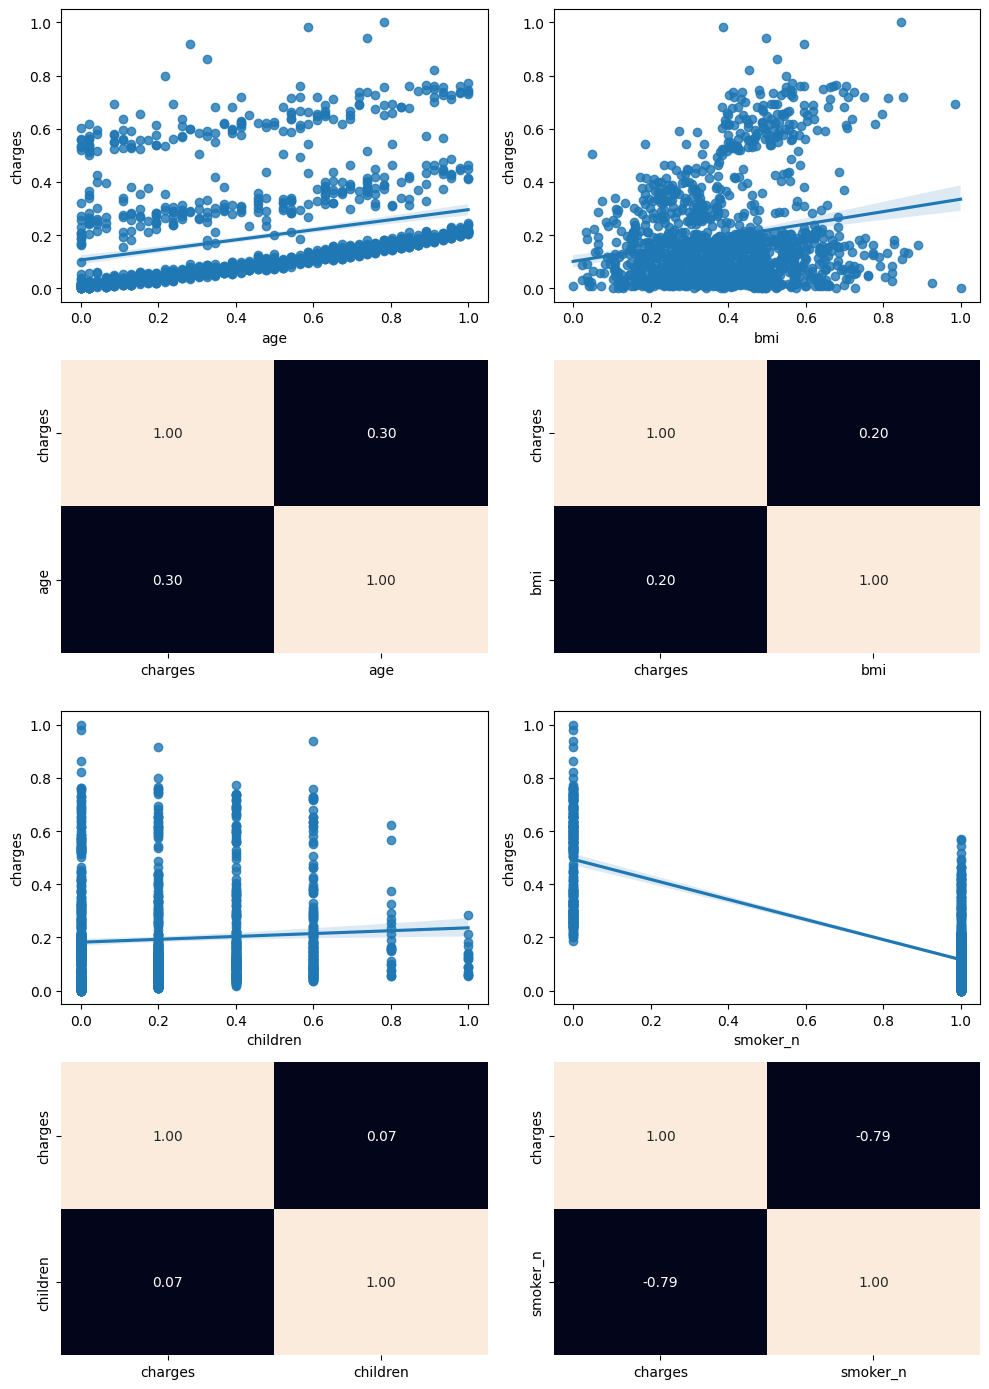

LinearRegression()
Intercep (a): 0.3195827183308946
Coefficients (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]
[ 0.10702315  0.07685187  0.2083241   0.48685684  0.12995459  0.19726353
  0.45755859  0.00832554  0.1556988   0.16287349  0.14781084  0.51037008
  0.4699569   0.25944432  0.14442757  0.13842465  0.05134994  0.49351746
  0.03848664  0.0705325   0.04276279  0.45855586  0.22245537  0.47182868
  0.47460549  0.06698449  0.55116209  0.5686984   0.15588314  0.20127518
  0.0770878   0.19051001 -0.00377298  0.17967676  0.61602286  0.18050297
  0.06028104  0.0447116   0.48287007  0.13064786  0.08387671  0.45610213
  0.54228697  0.17124485  0.09976616  0.03950023  0.07028081  0.12772953
  0.04874519  0.13229562  0.09175793  0.1653832   0.47297483  0.04437078
  0.16108797  0.14414371  0.14902535  0.02014774  0.48426463  0.13172362
  0.2337337   0.11691     0.18103216  0.00130779  0.25281818  0.14612565
  0.14268127  0.47671561  0.38076578  0.23721802  0.0985881   0.02074985

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
print(total_data.head())
total_data = total_data.drop_duplicates().reset_index(drop = True)
print(total_data.head())

total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
print(total_data_scal.head())

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

print(X_train_sel.head())
print(X_test_sel.head())

X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("clean_train.csv", index = False)
X_test_sel.to_csv("clean_test.csv", index = False)

train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

print(train_data.head())

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

model = LinearRegression()
print(model.fit(X_train, y_train))

print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

y_pred = model.predict(X_test)
print(y_pred)

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
